In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn import metrics
 

In [2]:
df_train=pd.read_csv("train.csv")


In [3]:
print(df_train.shape)
df_train.columns

(42000, 785)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
feature=[i for i in df_train.columns if i !="label"]


In [5]:
X_train,y_train=df_train[feature],df_train["label"]

In [6]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train.shape

(42000, 784)

In [7]:
print(type(X_train),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=1)
print(X_train.shape,X_val.shape)

(33600, 784) (8400, 784)


In [9]:
a=np.ptp(X_train,axis=0)
y_train.shape

(33600,)

In [10]:
b=np.ptp(y_train)

In [11]:
print(b)

9


In [12]:
norm=tf.keras.layers.Normalization(axis=-1)
norm.adapt(X_train)
X_train_norm=norm(X_train)
X_train_norm.shape

TensorShape([33600, 784])

In [13]:
c=np.ptp(X_train_norm,axis=0)

In [14]:
print(c)

[  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
 182.62848   139.64278   183.30557   183.3059      0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        183.30627   183.3063    143.93764   127.398384
 100.37448    82.82537    51.919216   42.179413   43.579624   40.60867
  42.95665    45.18325    44.233482   46.193142   54.337376   71.15157
  83.60458   143.7768    154.68465   183.3058      0.          0.
   0.          0.          0.          0.        183.30595   183.30585
 130.89445   120.05201    83.62378    45.968445   33.43107    25.588913
  20.024605   16.147722   13.017745   11.216493    9.809618    9.200073
   9.2857275  10.076259   11.230733   12.911655   16.724268   23.481974
  32.20591    62.20456    98.73212   141.60037     0.          0.
   0.          0.        183.30595   

In [15]:
model=Sequential([
    Dense(units=50,activation="relu"),
    Dense(units=30,activation="relu"),
    Dense(units=10,activation="linear")
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [17]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1050/1050 [==============================] - 5s 3ms/step - loss: 2.8755 - accuracy: 0.3982
Epoch 2/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0719 - accuracy: 0.6363
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.8107 - accuracy: 0.7302
Epoch 4/100
1050/1050 [==============================] - 7s 6ms/step - loss: 0.5885 - accuracy: 0.8300
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4529 - accuracy: 0.8835
Epoch 6/100
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3388 - accuracy: 0.9135
Epoch 7/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2723 - accuracy: 0.9313
Epoch 8/100
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2331 - accuracy: 0.9415
Epoch 9/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1954 - accuracy: 0.9502
Epoch 10/100
1050/1050 [==============================] - 3s 3ms/step - l

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (32, 50)                  39250     
                                                                 
 dense_13 (Dense)            (32, 30)                  1530      
                                                                 
 dense_14 (Dense)            (32, 10)                  310       
                                                                 
Total params: 41090 (160.51 KB)
Trainable params: 41090 (160.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss,test_accuracy=model.evaluate(X_val,y_val,verbose=2)

263/263 - 0s - loss: 0.6650 - accuracy: 0.9519 - 433ms/epoch - 2ms/step


In [ ]:
y_hat=model.predict(X_val)

263/263 [==============================] - 0s 1ms/step


In [ ]:
y_hat=tf.nn.softmax(y_hat).numpy()
y_hat.shape

(8400, 10)

In [ ]:
yhat=[np.argmax(i) for i in y_hat]

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val, yhat)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

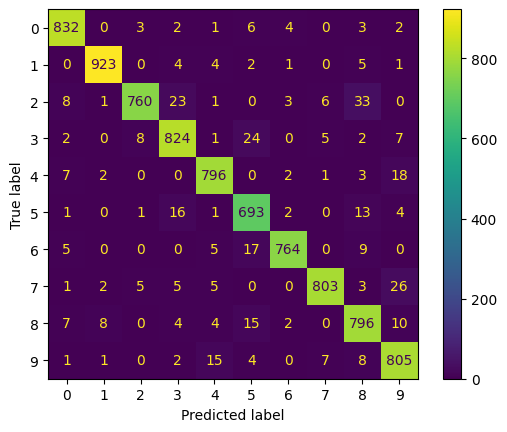

In [ ]:
cm_display.plot()
plt.show()



In [ ]:
Accuracy = metrics.accuracy_score(y_val, yhat)

print(Accuracy)



0.9519047619047619
